In [1]:
import numpy as np
import matplotlib.pyplot as plt

from activations import Activations

%load_ext autoreload
%autoreload 2

# Load ratemaps and init activations analisys

In [3]:
ratemaps = np.load('../data/activations512r40.npy')
activations = Activations(ratemaps)

# Calculate sacs of activations

In [4]:
sacs = activations.calculate_sacs()

# Compute persistence diagrams of sacs

In [5]:
dgms = activations.calculate_dgms()

# Visualize ratemap, sac and persistence diagram of sac

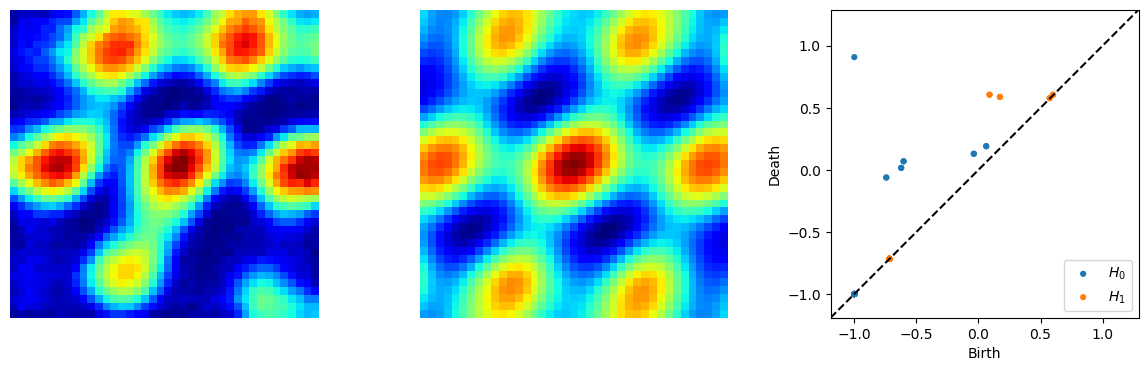

In [19]:
idx = 11
activations.plot_rm_sac_dgm(idx)

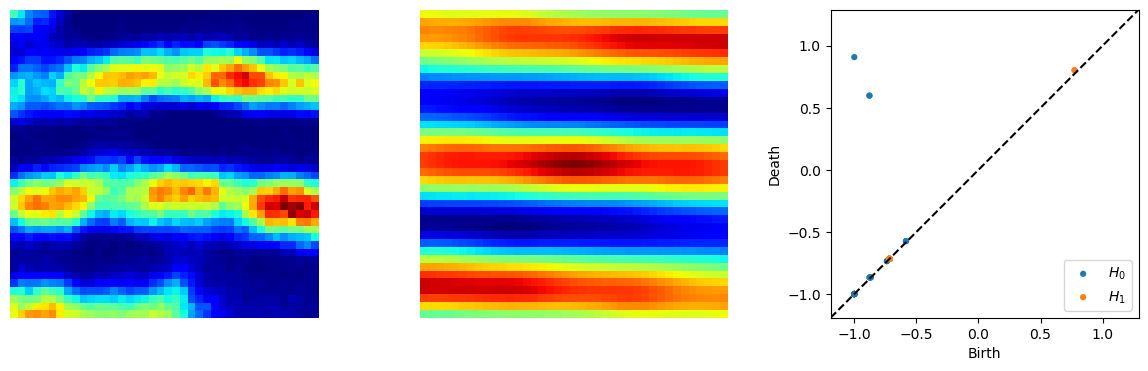

In [20]:
idx = 300
activations.plot_rm_sac_dgm(idx)

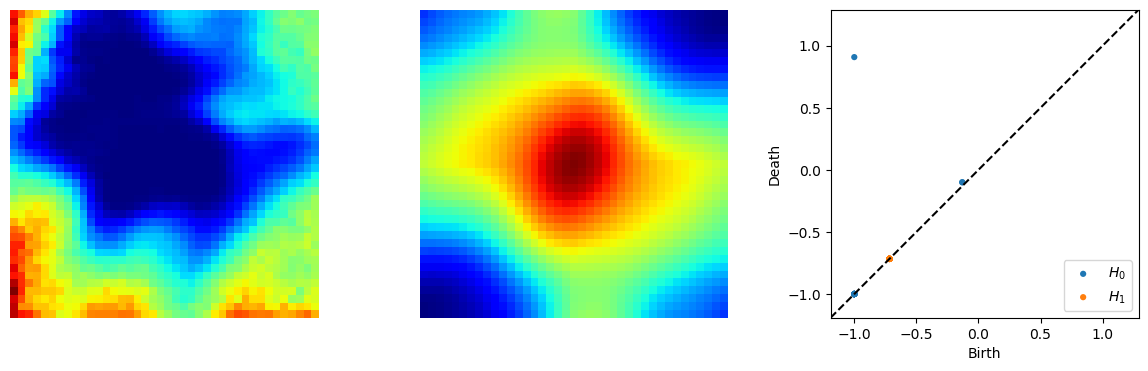

In [21]:
idx = 500
activations.plot_rm_sac_dgm(idx)

# Scale diagrams?

The SAC values are limited in the range [-1,1], since every entry of the sac matrix is the Pearson correlation coefficient beetween the ratemap and a shifted version of it.

The max value of every sacs is 1, because the central point of every sac is the Pearson r of the ratemap with itself.

In [60]:
np.max(sacs), np.min(sacs)

(1.0, -0.9081838486790071)

In [62]:
np.min(dgms[:,:,:2]),np.max(dgms[:,:,:2])

(-1.0, 0.9081838486790071)

The min value, instead, is different for every sacs.

The persistence diagram are computed on the super-level set filtration of the sacs, wich is the sub-level set filtration of the opposite: -sac.

So the min value of the filtration parameter is -1 for every sac, while the max value of the filtration parameter differs for evey sac.